In [1]:
# 911 Calls Capstone Project

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
# Check the head of df

In [7]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [8]:
# The top 5 zipcodes for 911 calls?

In [9]:
df['zip'].value_counts().head(5)

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: count, dtype: int64

In [10]:
# The top 5 townships (twp) for 911 calls? 

In [11]:
df['twp'].value_counts().head(5)

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: count, dtype: int64

In [12]:
# Take a look at the 'title' column, how many unique title codes are there? 

In [13]:
df['title'].nunique()

110

In [14]:
# Creating new features

In [15]:
# In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value. 

# For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. 

In [16]:
df['Reason']=df['title'].apply(lambda title: title.split(':')[0])
df.head(4)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS


In [17]:
# What is the most common Reason for a 911 call based off of this new column? 

In [18]:
df['Reason'].value_counts().head(1)

Reason
EMS    48877
Name: count, dtype: int64

In [19]:
#Using seaborn to create a countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

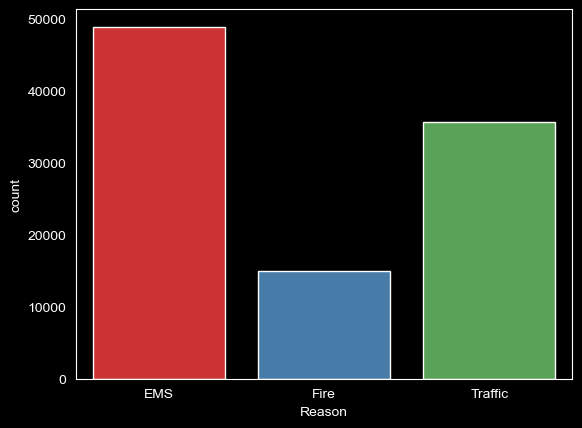

In [20]:
plt.style.use('dark_background')
sns.countplot(data=df,x='Reason', palette='Set1')

In [21]:
# Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? 

In [22]:
type(df['timeStamp'][0])

str

In [23]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [24]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [25]:
df['Hour']=df['timeStamp'].apply(lambda time:time.hour)
df['Month']=df['timeStamp'].apply(lambda time:time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [26]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

In [27]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [28]:
mmap= {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
df['Month'] = df['Month'].map(mmap)

In [29]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,August,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,August,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,August,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,August,Wed
99491,40.207055,-75.317952,MORRIS RD & S BROAD ST; UPPER GWYNEDD; 2016-08...,19446.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:17:02,UPPER GWYNEDD,MORRIS RD & S BROAD ST,1,Traffic,11,August,Wed


In [30]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())
df['Date'] = pd.to_datetime(df['Date'])
df['Month_no'] = df['Date'].dt.month
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date,Month_no
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,December,Thu,2015-12-10,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,December,Thu,2015-12-10,12


In [31]:
# Using seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. 

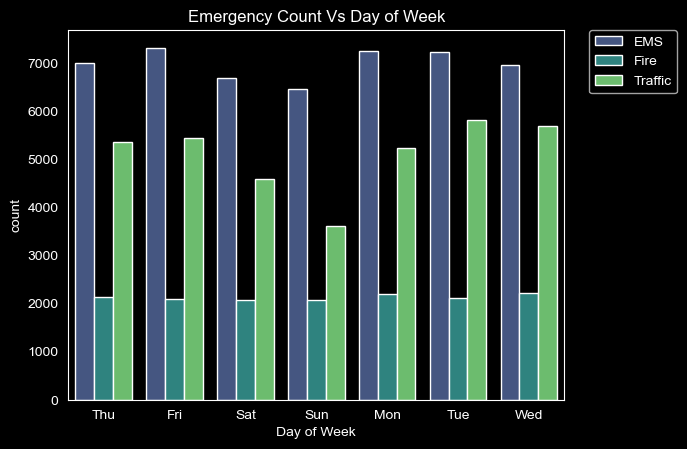

In [32]:
sns.countplot(df,x='Day of Week',hue='Reason',palette='viridis')
plt.legend(bbox_to_anchor=(1.05,1),borderaxespad=0)
plt.title('Emergency Count Vs Day of Week')
plt.show()

In [33]:
# Now doing the same for Month:

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\HP\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


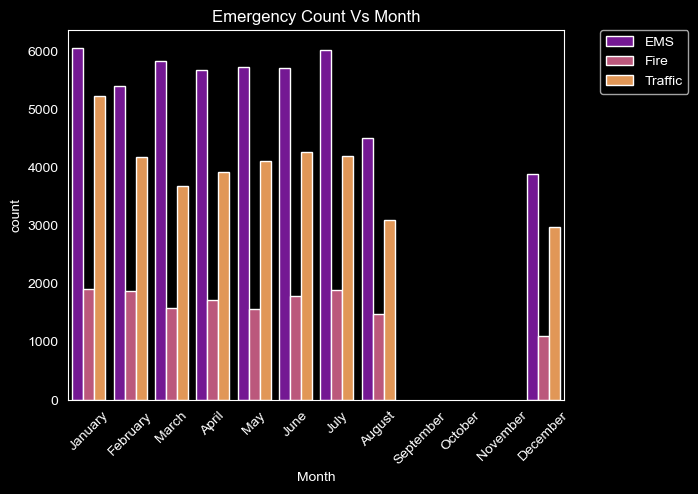

In [34]:
import calendar

df['Month'] = df['Month_no'].apply(lambda x:calendar.month_name[x])
month_order = [calendar.month_name[i] for i in range(1, 13)]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

sns.countplot(df,x='Month',hue='Reason',palette='plasma')
plt.legend(bbox_to_anchor=(1.25,1),borderaxespad=0)
plt.title('Emergency Count Vs Month')
plt.xticks(rotation=45)
plt.show()

In [35]:
#You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas

In [57]:
byMonth = df.groupby('Month_no').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Month_no,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [37]:
# Now create a simple plot off of the dataframe indicating the count of calls per month. 

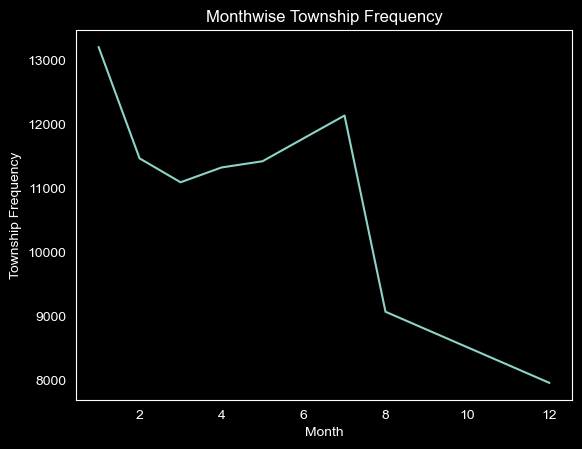

In [38]:
byMonth['twp'].plot()
plt.ylabel('Township Frequency')
plt.title('Monthwise Township Frequency')
plt.xlabel('Month')
plt.show()

In [39]:
# Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. 

In [40]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
Month_no,,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969,7969


In [41]:
df['Date']=df['timeStamp'].apply(lambda time:time.date())
df['Date'] = pd.to_datetime(df['Date'])
df['Month_no'] = df['Date'].dt.month
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date,Month_no
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,December,Thu,2015-12-10,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,December,Thu,2015-12-10,12


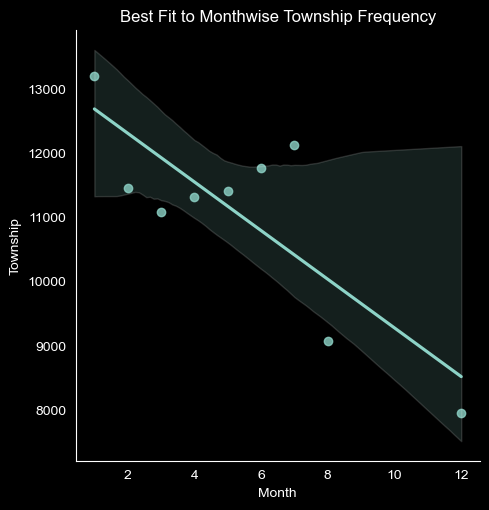

In [42]:
sns.lmplot(x='Month_no',y='twp', data=byMonth.reset_index())
plt.ylabel('Township')
plt.title('Best Fit to Monthwise Township Frequency')
plt.xlabel('Month')
plt.show()

In [43]:
# Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.

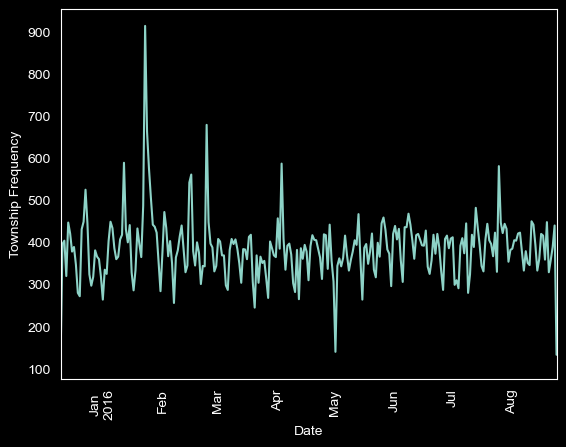

In [60]:
byDate = df.groupby('Date').count()['twp']
byDate.plot()
plt.ylabel('Township Frequency')
plt.xticks(rotation=90)
plt.show()

In [45]:
#Now recreating this plot but create 3 separate plots with each plot representing a Reason for the 911 call

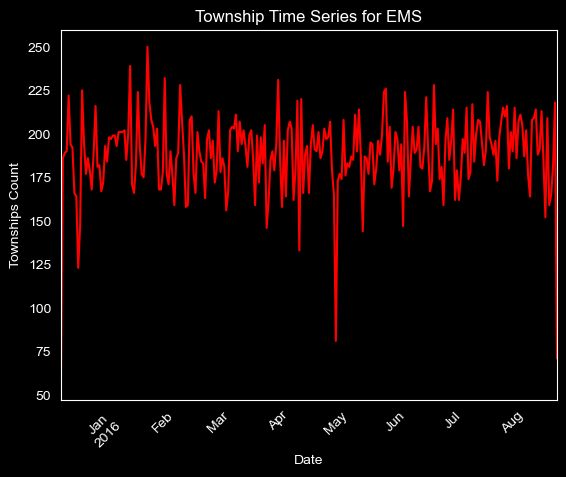

In [46]:
byDate = df[df['Reason']=='EMS'].groupby('Date').count()['twp']
byDate.plot(color='red')
plt.xticks(rotation=45)
plt.ylabel('Townships Count')
plt.title('Township Time Series for EMS')
plt.show()

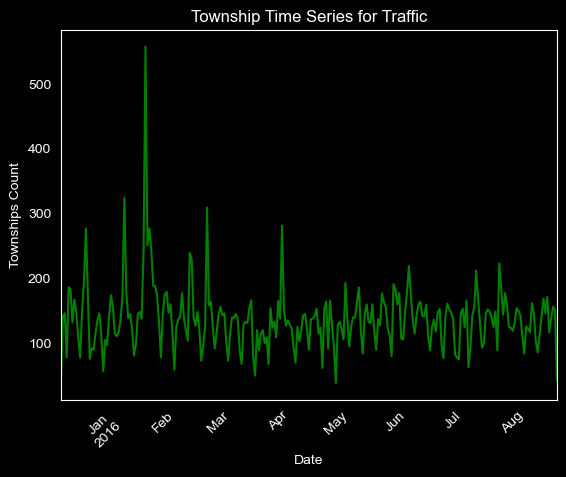

In [47]:
byDate = df[df['Reason']=='Traffic'].groupby('Date').count()['twp']
byDate.plot(color='green')
plt.xticks(rotation=45)
plt.ylabel('Townships Count')
plt.title('Township Time Series for Traffic')
plt.show()

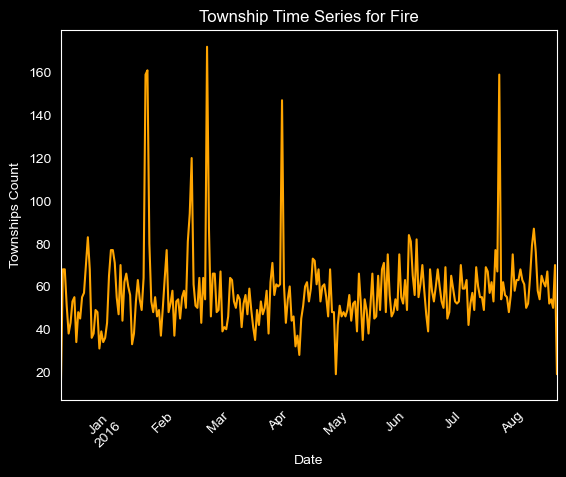

In [48]:
byDate = df[df['Reason']=='Fire'].groupby('Date').count()['twp']
byDate.plot(color='orange')
plt.xticks(rotation=45)
plt.ylabel('Townships Count')
plt.title('Township Time Series for Fire')
plt.show()

In [49]:
# Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but let's try to combine groupby with an [unstack]

In [50]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


Text(0.5, 1.0, '')

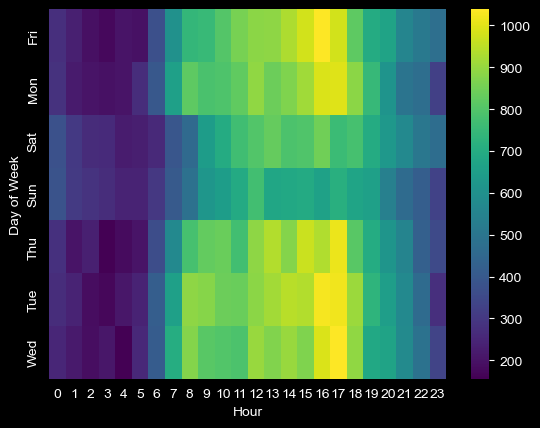

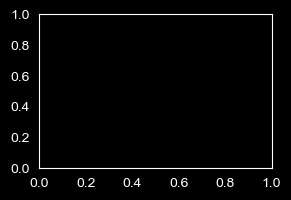

In [51]:
sns.heatmap(data=dayHour, cmap='viridis')
plt.figure(figsize=(3,2))
plt.title('')

<Figure size 1200x600 with 0 Axes>

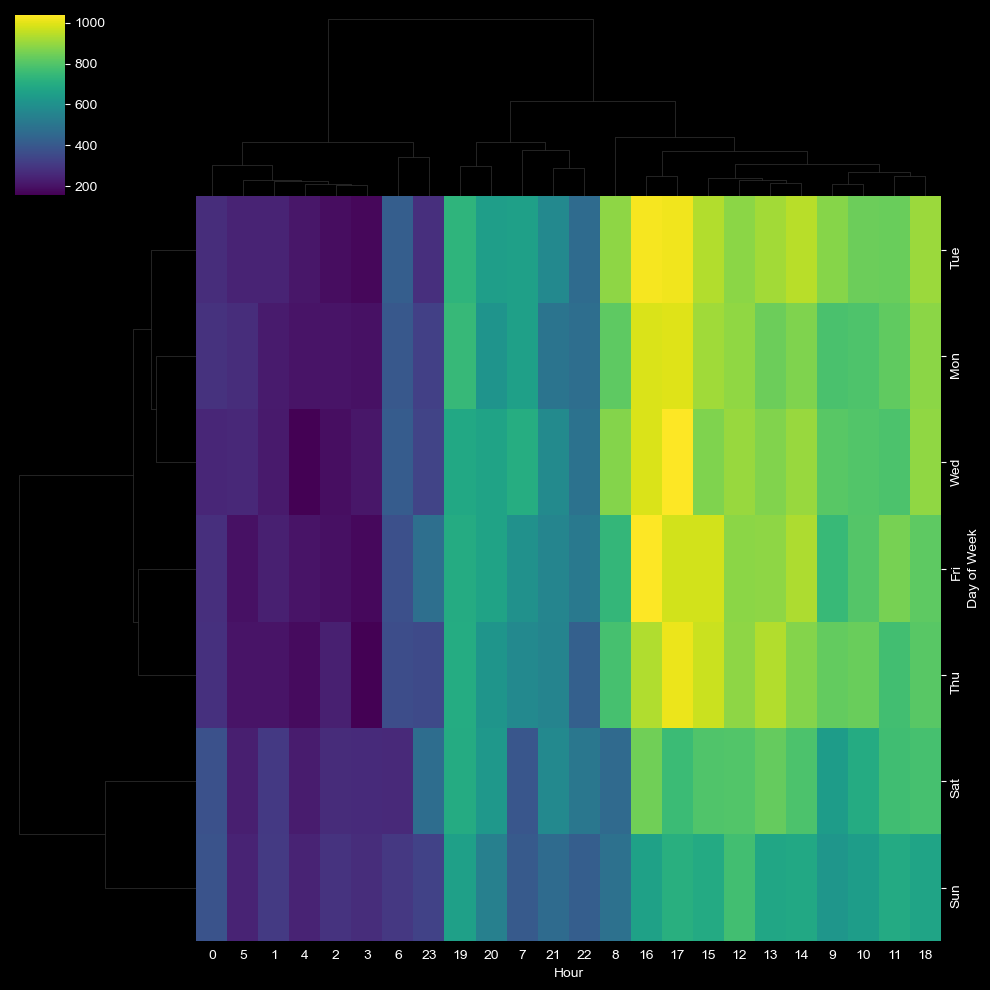

<Figure size 1200x600 with 0 Axes>

In [52]:
sns.clustermap(dayHour, cmap='viridis')
plt.figure(figsize=(12,6))

In [53]:
# Repeating these same plots and operations, for a DataFrame that shows the Month as the column. 

In [54]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()

C:\Users\HP\AppData\Local\Temp\ipykernel_17948\73668438.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()


<Axes: xlabel='Month', ylabel='Day of Week'>

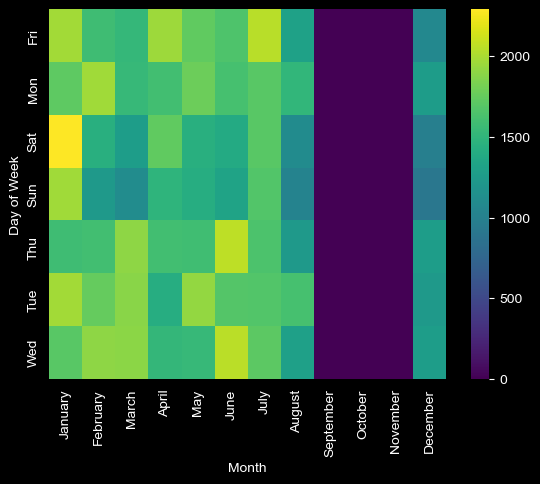

In [55]:
sns.heatmap(dayMonth,cmap='viridis')

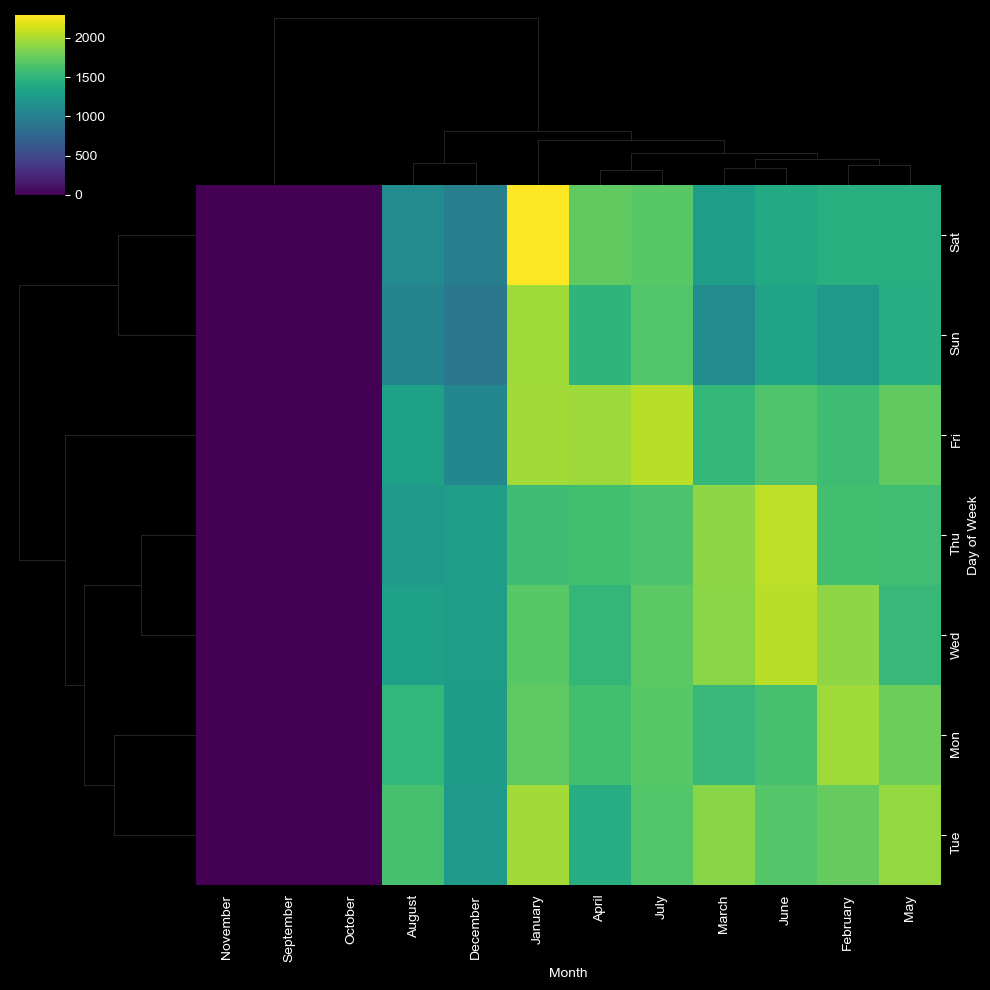

In [56]:
sns.clustermap(dayMonth, cmap='viridis')

In [61]:
df['Date'].min()

Timestamp('2015-12-10 00:00:00')

In [62]:
df['Date'].max()

Timestamp('2016-08-24 00:00:00')

In [77]:
df.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date,Month_no
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,December,Thu,2015-12-10,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,December,Thu,2015-12-10,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,December,Thu,2015-12-10,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,December,Thu,2015-12-10,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,December,Thu,2015-12-10,12
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,December,Thu,2015-12-10,12
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1,EMS,17,December,Thu,2015-12-10,12
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1,EMS,17,December,Thu,2015-12-10,12
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1,EMS,17,December,Thu,2015-12-10,12
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1,Traffic,17,December,Thu,2015-12-10,12


In [75]:
df['Date'] = pd.to_datetime(df['Date'])

In [78]:
ems_data = df[df['Reason']=='EMS']
traffic_data = df[df['Reason']=='Traffic']
fire_data = df[df['Reason']=='Fire']

In [83]:
ems_ts = ems_data.groupby('Date').size()
traffic_ts = traffic_data.groupby('Date').size()
fire_ts = fire_data.groupby('Date').size()

In [85]:
ems_ts = ems_ts.reindex(pd.date_range(start=ems_ts.index.min(), end=ems_ts.index.max(), freq='D'), fill_value=0)
traffic_ts = traffic_ts.reindex(pd.date_range(start=traffic_ts.index.min(), end=traffic_ts.index.max(), freq='D'), fill_value=0)
fire_ts = fire_ts.reindex(pd.date_range(start=fire_ts.index.min(), end=fire_ts.index.max(), freq='D'), fill_value=0)

In [86]:
import statsmodels

In [107]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA order (p, d, q)
order = (1, 1, 1)  # Example order, you may need to adjust

# Fit ARIMA model and forecast for each time series
ems_model = ARIMA(ems_ts, order=order)
ems_fitted = ems_model.fit()
ems_forecast = ems_fitted.forecast(steps=365)  # Forecast for 365 days (adjust as needed)

fire_model = ARIMA(fire_ts, order=order)
fire_fitted = fire_model.fit()
fire_forecast = fire_fitted.forecast(steps=365)

traffic_model = ARIMA(traffic_ts, order=order)
traffic_fitted = traffic_model.fit()
traffic_forecast = traffic_fitted.forecast(steps=365)

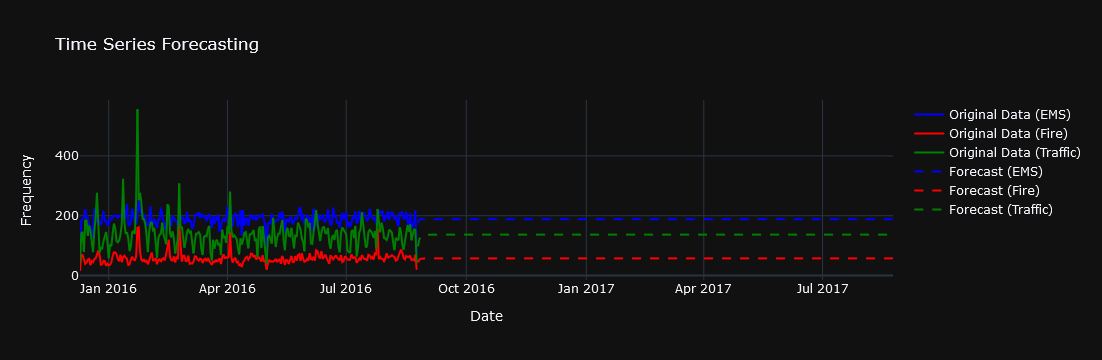

In [108]:
import plotly.graph_objects as go

# Create traces for original data
ems_trace = go.Scatter(x=ems_ts.index, y=ems_ts.values, mode='lines', name='Original Data (EMS)', line=dict(color='blue'))
fire_trace = go.Scatter(x=fire_ts.index, y=fire_ts.values, mode='lines', name='Original Data (Fire)', line=dict(color='red'))
traffic_trace = go.Scatter(x=traffic_ts.index, y=traffic_ts.values, mode='lines', name='Original Data (Traffic)', line=dict(color='green'))

# Create traces for forecasted data
ems_forecast_trace = go.Scatter(x=pd.date_range(start=ems_ts.index.max() + pd.Timedelta(days=1), end=ems_ts.index.max() + pd.Timedelta(days=365), freq='D'),
                                y=ems_forecast, mode='lines', name='Forecast (EMS)', line=dict(color='blue', dash='dash'))
fire_forecast_trace = go.Scatter(x=pd.date_range(start=fire_ts.index.max() + pd.Timedelta(days=1), end=fire_ts.index.max() + pd.Timedelta(days=365), freq='D'),
                                 y=fire_forecast, mode='lines', name='Forecast (Fire)', line=dict(color='red', dash='dash'))
traffic_forecast_trace = go.Scatter(x=pd.date_range(start=traffic_ts.index.max() + pd.Timedelta(days=1), end=traffic_ts.index.max() + pd.Timedelta(days=365), freq='D'),
                                    y=traffic_forecast, mode='lines', name='Forecast (Traffic)', line=dict(color='green', dash='dash'))

# Create figure
fig = go.Figure(data=[ems_trace, fire_trace, traffic_trace, ems_forecast_trace, fire_forecast_trace, traffic_forecast_trace])

# Update layout
fig.update_layout(
    title='Time Series Forecasting',
    xaxis_title='Date',
    yaxis_title='Frequency',
    template= 'plotly_dark'
)

# Show plot
fig.show()
